## Изучение общей информации. 

### Чтение файла с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Сохраняем данные в переменную, приводим таблицу к нормальному виду и проверяем на первых 5 строках.

### Изучение общей информации в полученном датафайле

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выводим общую информацию о данных. Можно заметить в каких столбцах не хватает значений, а также неправильные типы данных у некоторых столбцов.

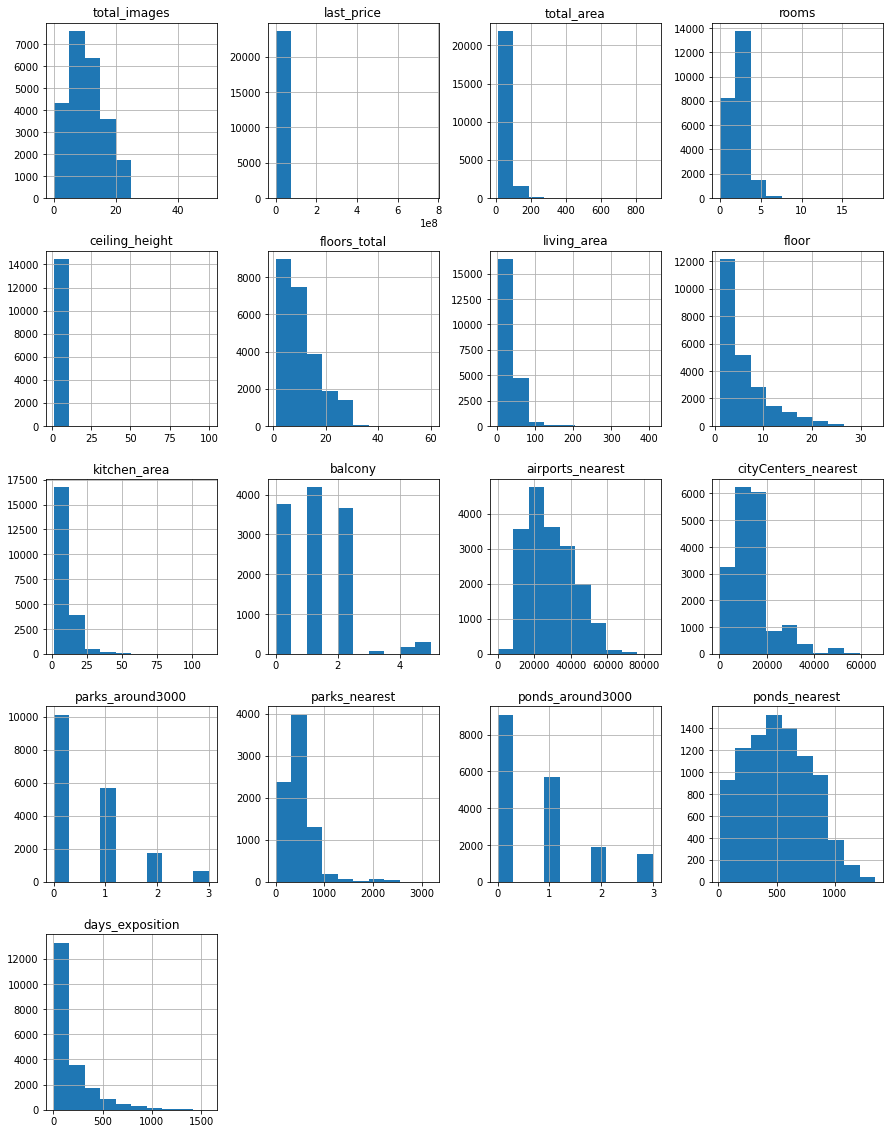

In [4]:
data.hist(figsize=(15, 20));

Выводим общую гистограмму для всех столбцов таблицы.

## Предобработка данных

### Поиск пропущенных значений и заполнение

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

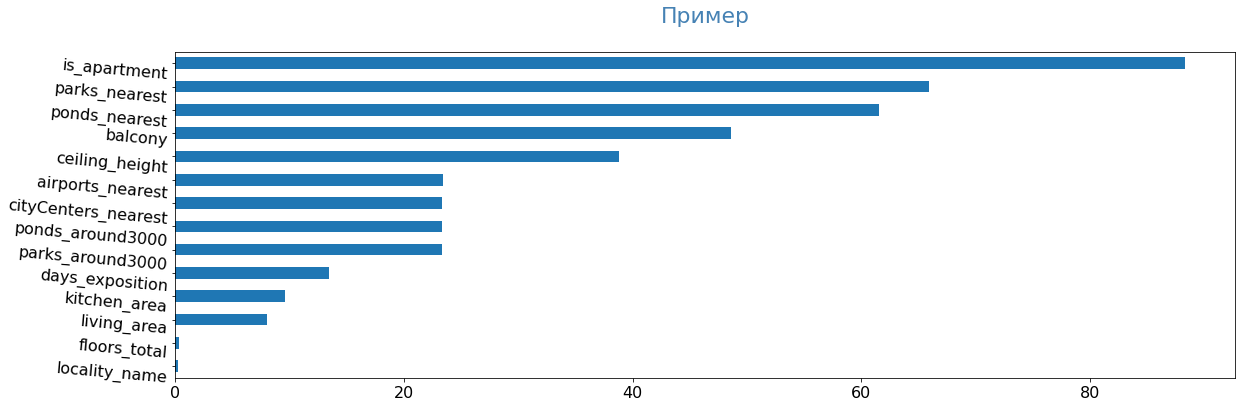

In [7]:
pass_value_barh(data)

Изучаем информацию о пропущенных данных в таблице. 

In [8]:
#Сохраняем в переменную а высоту аномально высоких потолков, скорее всего при введених их в таблицу была допущена ошибка
a = data.query('(ceiling_height > 14) and (ceiling_height != 100)') 
#Делим сохраненные в переменной данные, получаем нормальную высоту потолков и сохраняем их в датафрейме
data.loc[(data['ceiling_height'] > 14) & (data['ceiling_height'] != 100), 'ceiling_height'] = a['ceiling_height'] / 10
#Получаем медианное значение высоты потолков для заполнения пропусков и замены аномально высоких значений, которые невозможно восстановить
height_median = data['ceiling_height'].median()
data.loc[data['ceiling_height'] > 6, 'ceiling_height'] = height_median
data['ceiling_height'] = data['ceiling_height'].fillna(height_median)
data['ceiling_height'].isna().sum()

0

В столбце с высотой потолка обнаружились аномальные значения, часть из которых удалось восстановить с помощью деления, оставшиеся значения (больше 6 метров) были заменены на медиану. Пропущенные значения также были заполнены медианным значением высоты потолков.

In [9]:
bot_floor_med = data[(data['floor'] < 10) & (data['floor'] > 0)] ['floors_total'].median()
mid_floor_med = data[(data['floor'] >= 10) & (data['floor'] <= 20)] ['floors_total'].median()
high_floor_med = data[data['floor'] > 18] ['floors_total'].median()
data.loc[data['floors_total'] > 37, 'floors_total'] = high_floor_med


data.loc[(data['floor'] < 9) & (data['floors_total'].isna() == True), 'floors_total'] = \
data.loc[(data['floor'] < 9) & (data['floors_total'].isna() == True), 'floors_total'].fillna(bot_floor_med)

data.loc[(data['floor'] >= 9) & (data['floor'] < 17) & (data['floors_total'].isna() == True), 'floors_total'] = \
data.loc[(data['floor'] >= 9) & (data['floor'] < 17) & (data['floors_total'].isna() == True), 'floors_total'].fillna(mid_floor_med)

data.loc[(data['floor'] >= 17) & (data['floors_total'].isna() == True), 'floors_total'] = \
data.loc[(data['floor'] >= 17) & (data['floors_total'].isna() == True), 'floors_total'].fillna(high_floor_med)

data.query('floors_total < floor')
data['floors_total'].isna().sum()


0

Некоторые значения столбца были слишком высокими, максимально допустимым количеством стало 37 этажей, так как можно найти жилые комплексы с таким числом. Всё, что выше было заменено медианным значением наряду с пропущенными данными.

In [10]:

data.query('rooms == 0')

data.query('rooms == 0 and is_apartment == True')
data.query('rooms == 0 and studio == True')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.65,25.0,18.20,5,NaN,...,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,NaN,...,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Столбец с количеством комнат не содержал в себе пропусков, но была найдена особенность, что в некоторых квартирах количество комнат равнялось нулю. Такие значения были заменены в зависимости от общей площади квартиры.

In [13]:
# Делаем срез по пропущенным значениям в столбце с балконами и полученным данным присваиваем 0
data.loc[data['balcony'].isna() == True, 'balcony'] = 0
data['balcony'].isna().sum()

0

Скорее всего, пользователи оставляли этот столбец незаполненным потому, что в этих квартирах нет балкона, поэтому они были заполнены нулём.

### Удаление пропущенных названий населенных пунктов

In [14]:
# Делаем срез по пропущенным данным в столбце
data.query('locality_name.isna()==True')
# Удаляем строки с пропущенными занчениями из датафрейма
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

В столбце с названиями населенных пунктов были найдены пропуски, логически заполнить которые не представляется возможным. По этой причине они были удалены из датафрейма.

### Обработка неявных дубликатов

In [15]:
# Смотрим уникальные значения в столбце с названиями населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
# Создаем цикл проверяющий уникальные наименования населенных пунктов и заменяющий неявные дуликаты
for city in data['locality_name'].unique():
    if 'поселок' in city:
        print(city)
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].str.replace('е', 'ё')
    elif 'Никольское' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'село Никольское')
    elif 'Советский' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'посёлок городского типа Советский')
    elif 'Большая Ижора' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'посёлок городского типа Большая Ижора')
    elif 'Лесогорский' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'посёлок городского типа Лесогорский')
    elif 'Рябово' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'посёлок городского типа Рябово')
    elif 'Мга' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'посёлок городского типа Мга')
    elif 'Павлово' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'посёлок городского типа Павлово')
    elif 'Назия' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'посёлок городского типа Назия')
    elif 'Лесное' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'коттеджный посёлок Лесное')
    elif 'Мурино' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'Мурино')
    elif 'Любань' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'Любань')
    elif 'Рощино' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'посёлок городского типа Рощино')
    elif 'Кудрово' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'Кудрово')
    elif 'Зёлёный ' in city:
        data.loc[data['locality_name'] == city, 'locality_name'] = \
        data[data['locality_name'] == city]['locality_name'].replace(city, 'посёлок Пансионат Зелёный Бор')                                                   
data['locality_name'].unique()

поселок городского типа Красный Бор
поселок Мурино
поселок Молодцово
поселок городского типа Кузьмоловский
поселок городского типа Ефимовский
поселок Торковичи
поселок Первомайское
поселок Новый Свет
поселок Романовка
поселок Бугры
поселок городского типа Рощино
поселок Оредеж
поселок городского типа Синявино
поселок Терволово
поселок городского типа Советский
поселок Сельцо
поселок Севастьяново
городской поселок Большая Ижора
поселок Цвелодубово
поселок городского типа Рахья
поселок городского типа Вырица
поселок Заводской
поселок Зимитицы
поселок Барышево
поселок городского типа имени Свердлова
поселок Рябово
поселок станции Корнево
поселок Елизаветино
поселок Запорожское
поселок Ильичёво
поселок станции Вещево
поселок городского типа Дубровка
поселок Войсковицы
поселок городского типа Приладожский
поселок городского типа Никольский
поселок Тельмана
поселок Углово
поселок Старая Малукса
поселок Аннино
поселок Победа
поселок Семрино
поселок Гаврилово
поселок Глажево
поселок Кобринское

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина', 'посёлок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Пёрвомайскоё',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Св

Большое количество неявных дубликатов в столбце было исправлено с помощью цикла. Чаще всего встречались населенные пункты, в названии которых был "поселок" или "посёлок".

In [17]:
# check
data['locality_name'].nunique()

336

In [18]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

Для удобства работы с таблицей переименуем название столбца.

In [19]:
data.loc[data['last_price'] == 12190, 'last_price'] = data['last_price'].median()

Заменим минимальное значение в столбце с ценой квартиры на медианное значение.

### Преобразование типов данных в столбцах

In [21]:
for i in data:
    data['last_price'] = data['last_price'].astype(int)
    data['rooms'] = data['rooms'].astype(int)
    data['floors_total'] = data['floors_total'].astype(int)
    data['floor'] = data['floor'].astype(int)
    data['balcony'] = data['balcony'].astype(int)

 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['is_apartment'] = data['is_apartment'].astype(bool)
data['studio'] = data['studio'].astype(bool)
data['open_plan'] = data['open_plan'].astype(bool)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Был преобразован тип данных некоторых столбцов. Цена столбца переведена в целочисленный тип данных, дата и время первого дня публикации был преобразован в формат datetime, удалив при этом время публикации, так как оно всегда равно нулю. Также, тип данных столбца с количеством комнат, столбца с этажем и столбца с количеством балконово переведены в целочисленный тип. Столбцы "апартаменты", "студия" и "открытая планировка" преобразованы в булевы тип, так как значения в данных столбцах только True и False.

### Удаление аномальных значений

In [22]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,650.00","23,650.00","23,650.00","20,470.00","23,650.00","21,752.00","21,381.00","23,650.00","23,650.00"
min,0.00,12.00,1.00,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,19.00,900.00,6.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,37.00


In [26]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.17,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.9,3.00,93.50,3.00,459.10,"10,900,000.00",55.00,15.90,13.00,22.00
0.9976,7.00,309.77,4.00,"1,311.62","82,000,000.00",181.44,50.00,25.00,27.00


In [27]:
data = data.loc[(data['total_area'] <= 200) & (data['rooms'] <= 7)]
data = data.loc[data['last_price'] <= 100000000]

In [28]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,413.00","23,413.00","23,413.00","20,289.00","23,413.00","21,543.00","21,173.00","23,413.00","23,413.00"
min,0.00,12.00,1.00,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,7.00,200.00,5.80,"1,580.00","98,000,000.00",164.70,93.20,33.00,37.00


**Промежуточный вывод**

В ходе предобработки данных были изменены типы данных некоторых столбцов таблицы, заполнены пропуски в данных, удалены пропуски, которые невозможно заполнить, исправлены аномальные значения в данных, удалены неявные дубликаты.

## Добавление новых столбцов в таблицу

### Добавление столбца с ценой за кв.м.

In [29]:
data['sq_meter_price'] = round(data['last_price'] / data['total_area'])

Добавим новый столбец в таблицу с ценой за один квадратный метр.

### Добавление столбцов с днем недели, месяцем и годом публикации.

In [30]:
data['publication_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [31]:
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [32]:
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,publication_weekday,publication_month,publication_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018


Добавим столбцы с днем недели, месяцем и годом публикации.

### Функция распределения этажей на категории.

In [33]:
# Функция для распределения этажей по 3 категориям
def floor(data):
    fl_total = data['floors_total']
    fl = data['floor']
    if fl == 1:
        return 'первый'
    elif fl == fl_total:
        return 'последний'
    elif fl <= 0:
        return 'ошибка'
    else:
        return 'другой'
# Добавление в таблицу столбца с тремя категорями этажей и применение функции
data['floor_type'] = data.apply(floor, axis=1)

Для распределения этажей на "первый", "последний" и "другой" была написана функция и применена для нового столбца в таблице.

In [34]:
# check
data[data['floor'] == 1][['floor', 'floors_total','floor_type']]['floor_type'].value_counts()

первый    2896
Name: floor_type, dtype: int64

### Добавление столбца с с расстоянием до центра города в километрах.

In [35]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_centers_nearest_km, dtype: float64

Перевод расстояния до центра города из метров в километры и сохранение полученных значений в новый столбец.

**Промежуточный вывод**

В таблицу были добавлены столбцы с днем недели, месяцем, годом публикации, столбец с категориями этажей, а также столбец с расстоянием до центра в километрах.

## Проведите исследовательский анализ данных

### Изучение общей площади квартир.

mean      58.106885
median    51.700000
Name: total_area, dtype: float64

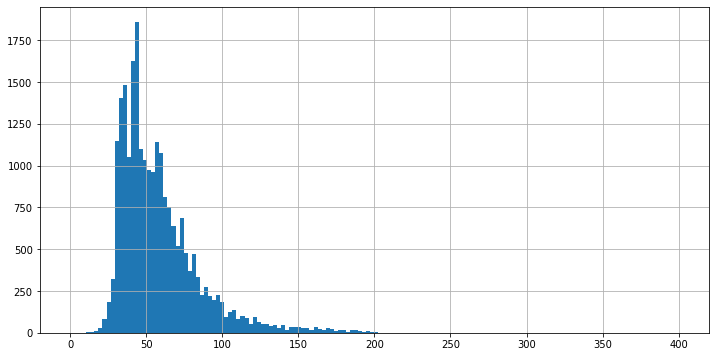

In [36]:
data['total_area'].hist(bins=150, figsize=(12, 6), range=(0, 400))
data['total_area'].agg(['mean', 'median'])

На графике общей площади квартир можно видеть, что общая площадь основной части квартир составляет от 20 до 50 кв.м, с увеличением площади количество квартир снижается, объектов с площадью от 50 до 100 кв.м заметно меньше, однако есть малое число квартир с площадью от 100 до 200 кв.м.

### Изучение жилой площади.

mean      33.21241
median    30.00000
Name: living_area, dtype: float64

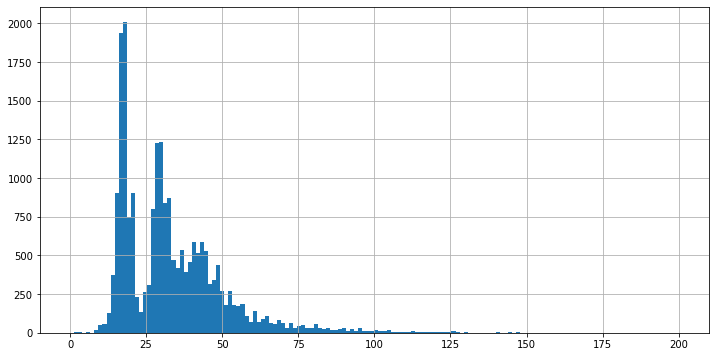

In [37]:
data['living_area'].hist(bins=150, figsize=(12, 6), range=(0, 200))
data['living_area'].agg(['mean', 'median'])

Жилая площадь большинства квартир составляет примерно 20 кв.м, квартир с площадью 30 кв.м. примерно в 2 раза меньше. Еще меньше квартир с площадью более 30 кв.м. 

### Изучение площади кухни.

mean      10.374647
median     9.000000
Name: kitchen_area, dtype: float64

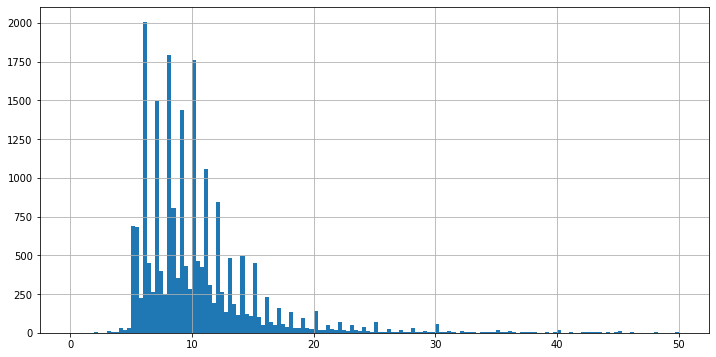

In [38]:
data['kitchen_area'].hist(bins=150, figsize=(12, 6), range=(0, 50))
data['kitchen_area'].agg(['mean', 'median'])

Основная часть квартир имеет площадь кухни околко 6 кв.м, немногим меньше квартир с кухнями площадью 8 кв.м. и 10 кв.м. Большое количество квартир имеют кухни с площадью 7 кв.м и 9 кв.м. Количество объектов, где площадь более 11 кв.м. невелико и резко падает после отметки в 15 кв.м.

### Изучение стоимости квартир.

mean      5975976.0
median    4600000.0
Name: last_price, dtype: float64

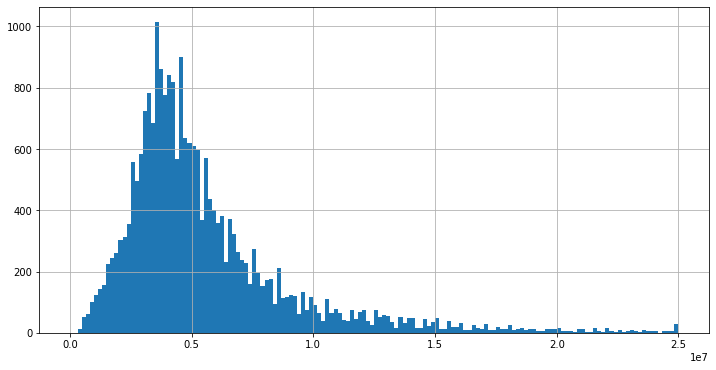

In [39]:
data['last_price'].hist(bins=150, figsize=(12, 6), range=(0, 25000000))
round(data['last_price'].agg(['mean', 'median']))

Большинство квартир имеют стоимость от 2 до 5 млн. Начиная с отметки в 5 млн. количество квартир сильно снижается. 

### Изучение кол-ва комнат в квартирах.

mean      2.032503
median    2.000000
Name: rooms, dtype: float64

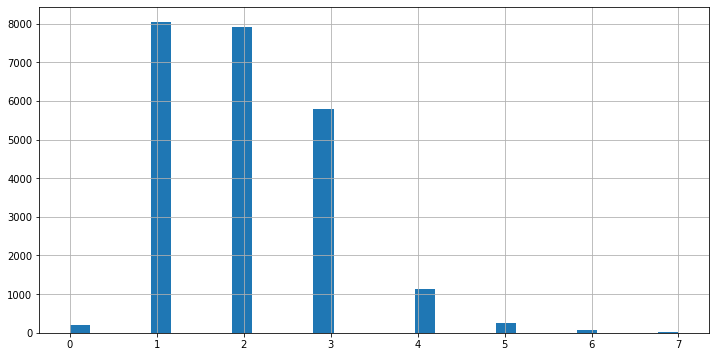

In [40]:
data['rooms'].hist(bins=30, figsize=(12, 6), range=(0, 7))
data['rooms'].agg(['mean', 'median'])

Самыми распространнеными являются однокомнатные квартиры, двухкомнатных квартир почти столько же, трехкомнатных квартир уже заметно меньше, число квартир-студий, с 4 комнатами и более гораздо меньше.

### Изучение высоты потолка в квартирах.

mean      2.691832
median    2.650000
Name: ceiling_height, dtype: float64

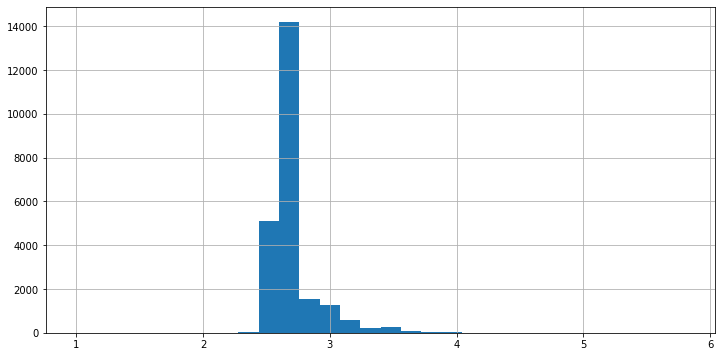

In [41]:
data['ceiling_height'].hist(bins=30, figsize=(12, 6))
data['ceiling_height'].agg(['mean', 'median'])

В основном высотка потолка в квартирах составялет 2,6 метра. Однако у почти 4500 квартир высота равна 2.5 метрам. Иногда встречаются также квартиры с высотой 3 метра, еще реже с высотой более 3.5 метров.

### Изучечние этажности квартир.

mean      5.903857
median    4.000000
Name: floor, dtype: float64

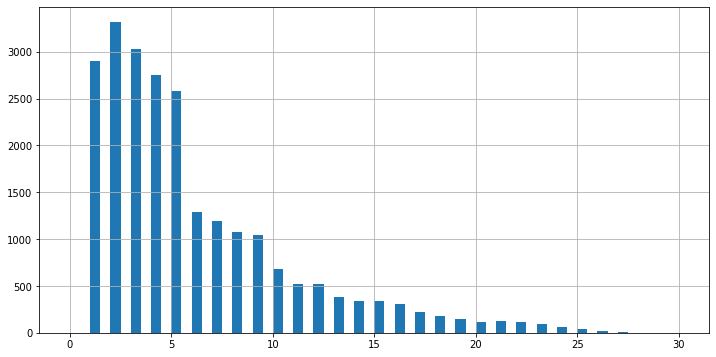

In [42]:
data['floor'].hist(bins=60, figsize=(12, 6), range=(0,30))
data['floor'].agg(['mean', 'median'])

Как правило большая часть квартир находится на 2, 3, 1, 4 и 5 этажах. Достаточно редко встречаются квартиры на 6 этаже и выше.

<AxesSubplot:>

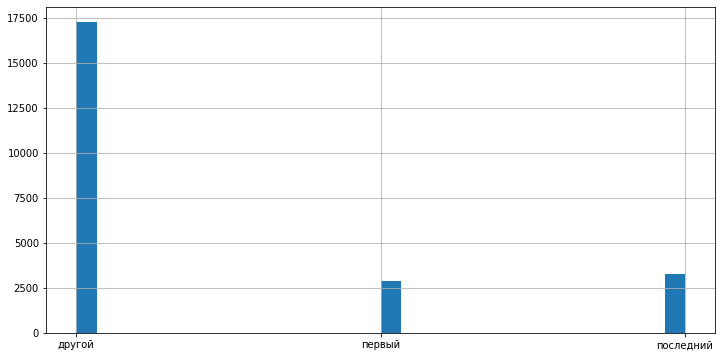

In [43]:
data['floor_type'].hist(bins=30, figsize=(12, 6));

Основная масса квартир находится на промежуточных этажах (почти 17500), на последнем этаже находится примерно 3500 квартир, меньше всего квартир на первом этаже (около 3000).

mean      10.728313
median     9.000000
Name: floors_total, dtype: float64

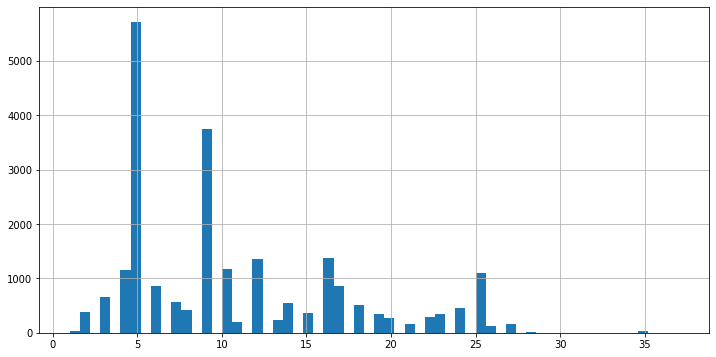

In [44]:
data['floors_total'].hist(bins=60, figsize=(12, 6))
data['floors_total'].agg(['mean', 'median'])

Большая часть квартир находится в пятиэтажных зданиях, далее идут девятиэтажные. Примерно одинаковое количество квартир (около 1500) находится в двенадцати-, шестьнадцати- и двадцатипятиэтажных домах.

### Изучение удаленности квартир от центра города, аэропорта и парков.

mean      14293.15559
median    13164.00000
Name: city_centers_nearest, dtype: float64

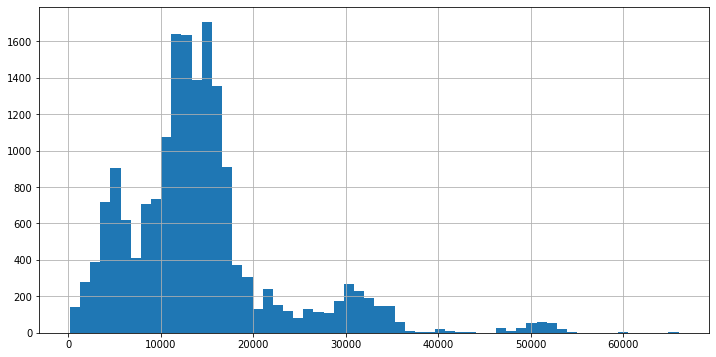

In [45]:
data['city_centers_nearest'].hist(bins=60, figsize=(12, 6))
data['city_centers_nearest'].agg(['mean', 'median'])

Основная часть квартир находится на расстоянии от 10000 до 18000 м. Малая часть объектов находится на расстоянии до 10000 м. Также, есть небольшое число квартир, которые находятся на очень большом расстоянии до центра (более 60000)

mean      28834.065694
median    26831.000000
Name: airports_nearest, dtype: float64

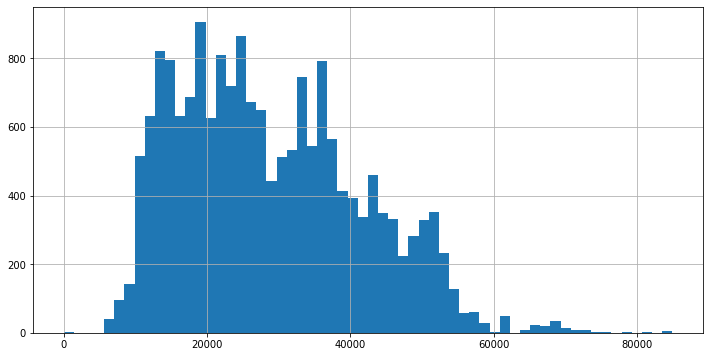

In [46]:
data['airports_nearest'].hist(bins=60, figsize=(12, 6))
data['airports_nearest'].agg(['mean', 'median'])

Можно заметить, что большая часть объектов недвижимости находится на расстоянии от 10000 до 30000 метров от аэропорта. 

mean      492.069812
median    456.000000
Name: parks_nearest, dtype: float64

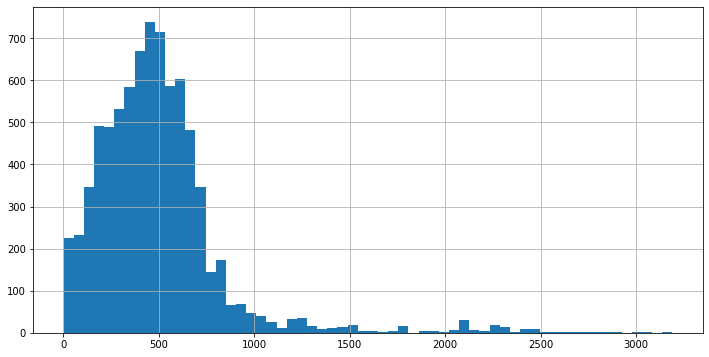

In [47]:
data['parks_nearest'].hist(bins=60, figsize=(12, 6))
data['parks_nearest'].agg(['mean', 'median'])

Множество объектов недвижимости распологается на расстоянии до 500 метров от парка, часть квартир находится на расстоянии от 500 до 800 метров. 

### Изучение времени публикации объявлений.

mean      2.567719
median    3.000000
Name: publication_weekday, dtype: float64

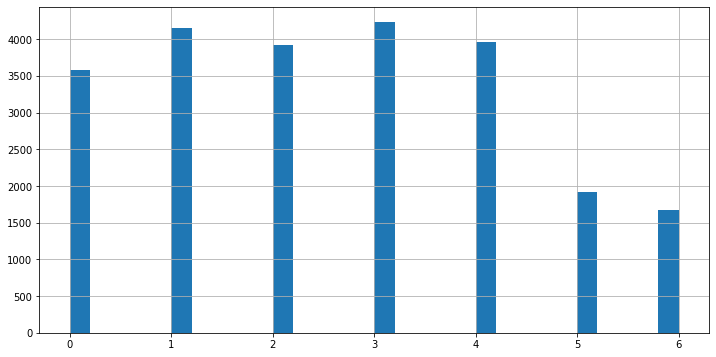

In [48]:
data['publication_weekday'].hist(bins=30, figsize=(12, 6))
data['publication_weekday'].agg(['mean', 'median'])

Как правило, объявления публиковались в будние дни. Чаще всего в четверг и среду.

mean      6.402127
median    6.000000
Name: publication_month, dtype: float64

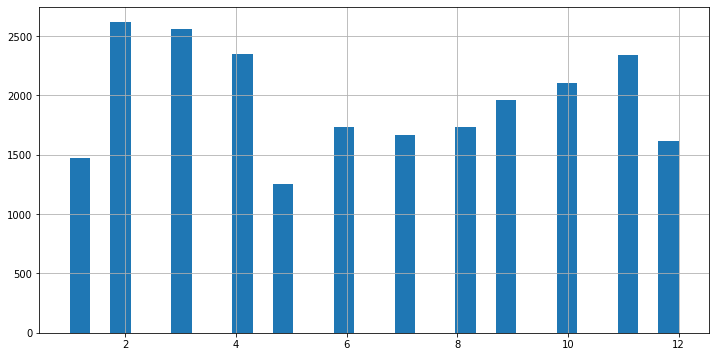

In [49]:
data['publication_month'].hist(bins=30, figsize=(12, 6))
data['publication_month'].agg(['mean', 'median'])

Большинство объявлений было опубликовано в феврале, марте, апреле и ноябре.

### Изучение скорости продажи квартир.

mean      179.544137
median     95.000000
Name: days_exposition, dtype: float64

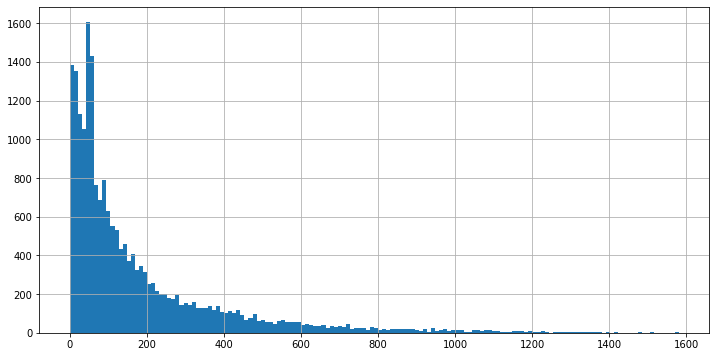

In [50]:
data['days_exposition'].hist(bins=150, figsize=(12, 6))
data['days_exposition'].agg(['mean', 'median'])

Быстрой продажей можно считать сделки, завершенные менее, чем за 30 дней, очень долгой продажей является сделка заверешенная за 600 дней и более.
В среднем продажа занимает 179,5 дня, по медиане она занимает 95 дней.

### Изучение зависимости цены от площади квартир и кол-ва комнат.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

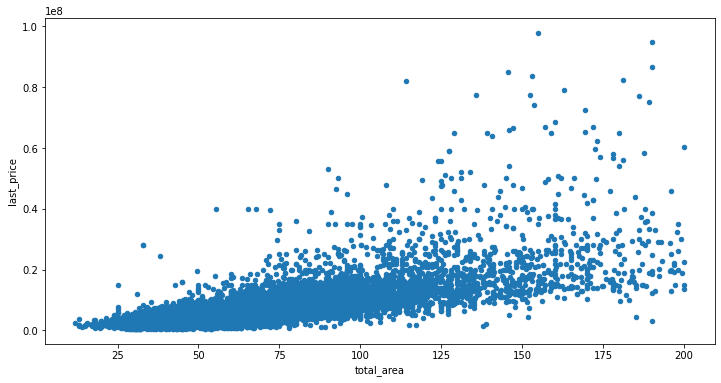

In [51]:
#data['total_area_cat'] = pd.qcut(data['total_area'], 10)
data.plot(x='total_area', y='last_price',kind='scatter', figsize=(12, 6));

Заметен постепенный рост цены с увеличением общей площади, примерно с площади в 125 кв.м. разброс значений увеличивается и уменьшается количество квартир.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

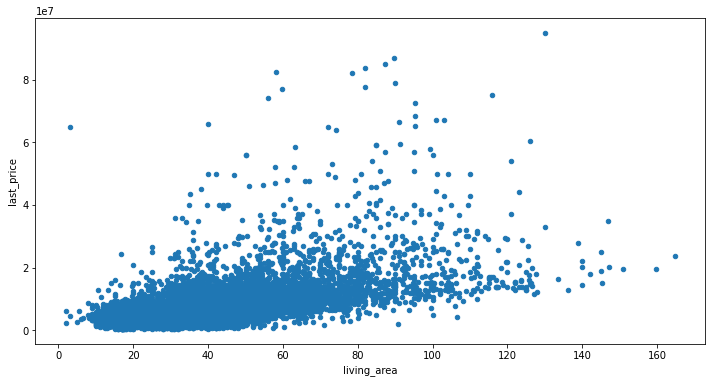

In [52]:
data['living_area_cat'] = pd.qcut(data['living_area'], 4)
total_area_price = data.pivot_table(index='living_area_cat', values='last_price', aggfunc='median')
data.plot(x='living_area', y='last_price' ,kind='scatter', figsize=(12, 6));

Можно видеть медленный рост цен квартир с площадью до 60 кв.м., далее разброс увеличивается, и количество квартир уменьшается. 

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

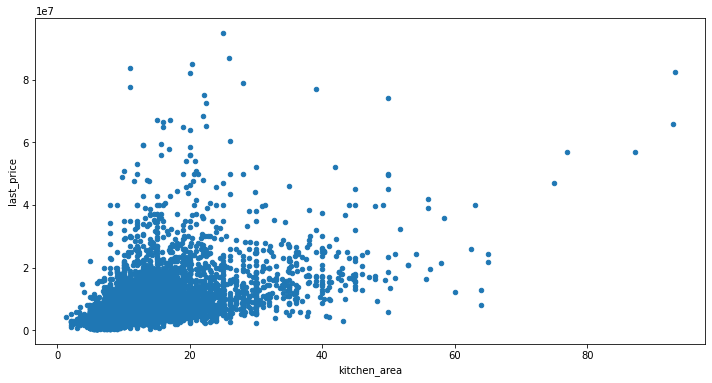

In [53]:
data['kitchen_area_cat'] = pd.qcut(data['kitchen_area'], 3)
living_area_price = data.pivot_table(index='kitchen_area_cat', values='last_price', aggfunc='median')
data.plot(x='kitchen_area', y='last_price' ,kind='scatter', figsize=(12, 6))

Большая часть квартир имеет кухни площадью до 25 кв.м. При этом видно, что есть большое количество квартир, которые стоят дороже основной массы в этом промежутку. Квартир с площадью более 25 кв.м. заметно меньше.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

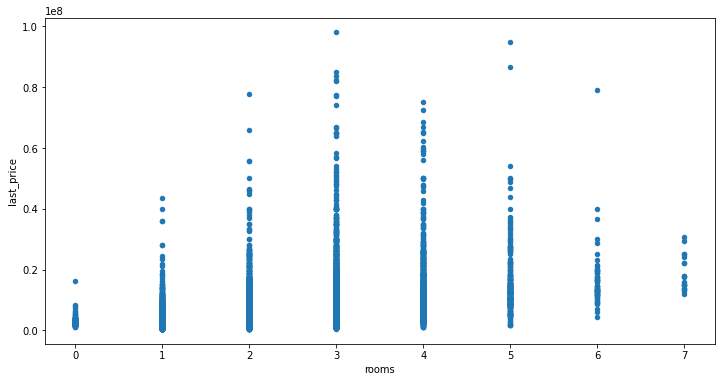

In [54]:
rooms_area_price = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
data.plot(x='rooms', y='last_price' ,kind='scatter', figsize=(12, 6))

Можно видеть сильный разброс цен на квартиры с тремя комнатами, в этой категории находятся самые дорогие объекты. Далее следуют квартиры с четырьмя комнатами.

### Изучение зависимости стоимости квартир от различных факторов.

<AxesSubplot:xlabel='floor_type'>

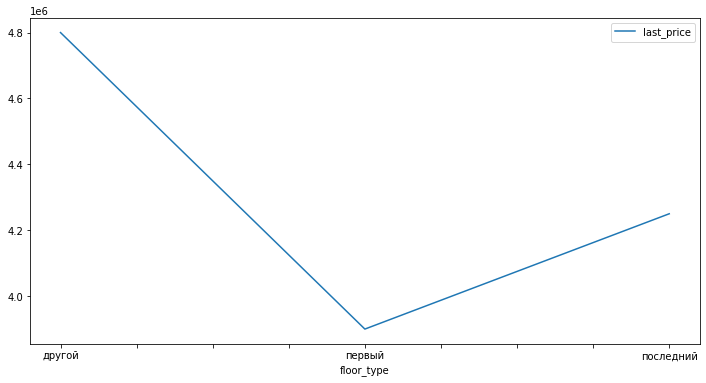

In [55]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(figsize=(12, 6));


Самыми недорогими являются квартиры на первом этаже, дороже всего стоят квартиры между первым и последним этажем.

-0.010662325783377762

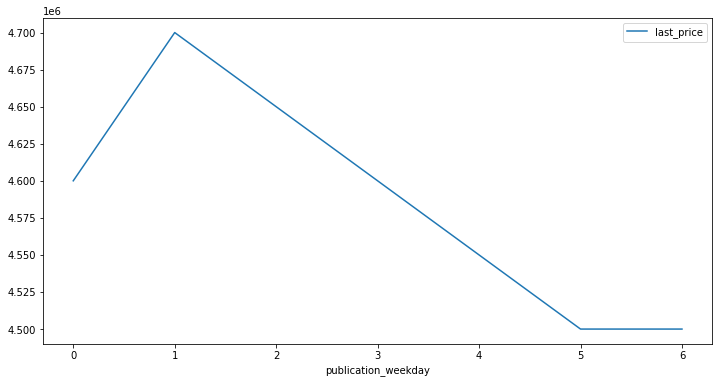

In [56]:
data.pivot_table(index='publication_weekday', values='last_price', aggfunc='median').plot(figsize=(12, 6))
(data['last_price'].corr(data['publication_weekday']))

Корреляция между стоимостью и днем недели публикации очень маленькая. График показывает, что самые дорогие квартиры публиковались по вторникам.

0.006939316437595124

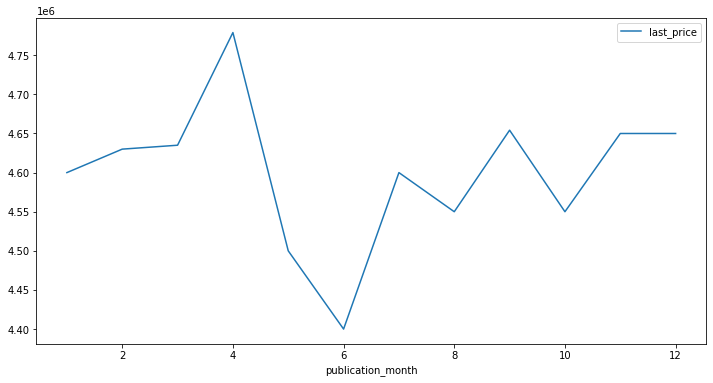

In [57]:
data.pivot_table(index='publication_month', values='last_price', aggfunc='median').plot(figsize=(12, 6))
(data['last_price'].corr(data['publication_month']))

Также, цена очень слабо зависит от месяца публикации.

-0.04818767661612359


133

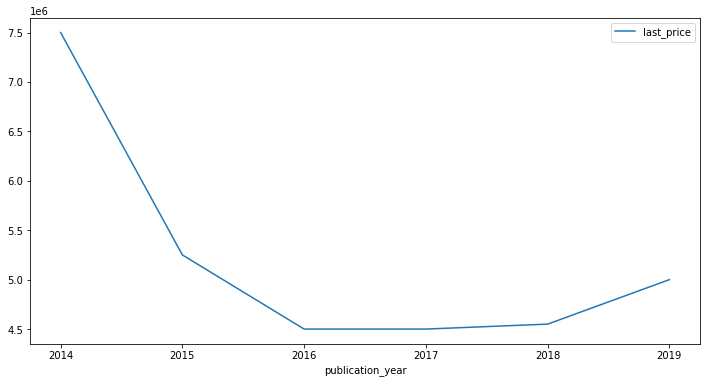

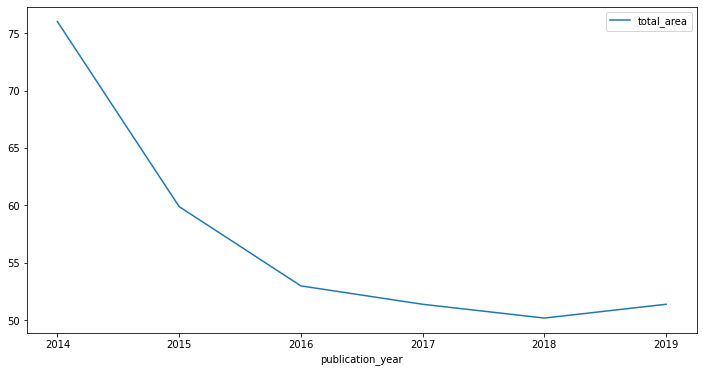

In [58]:

data.pivot_table(index='publication_year', values='last_price', aggfunc='median').plot(figsize=(12, 6))
data.pivot_table(index='publication_year', values='total_area', aggfunc='median').plot(figsize=(12, 6))
print((data['last_price'].corr(data['publication_year'])))
data.query('publication_year == 2014')['publication_year'].count()

Год опубликования объявления почти влияет на стоимость, публикации. В 2014 году были опубликованы квартиры с самой большой площадью и оттого самые дорогие. Однако их количество очень маленькое в масштабе всей таблицы.

### Изучение цены за кв.м. в разных населенных пунктах.

In [59]:
# Сгруппируем данные по городам с самым большим количеством объявлений и отсортируем
cities_top = data.groupby('locality_name')['total_area'].count().sort_values()
# Сохраним 10 населенных пунктов с самым большим количеством объявлений в переменной
cities_list = cities_top.tail(10).index.unique()

In [60]:
# При помощи цикла выведем среднюю стоимость одного квадратного метра в каждом из 10 выбранных городов
city_l =[]
price_l = []
for city in data['locality_name'].unique():
    if city in cities_list:
        city_l.append(city)
        price_l.append(round(data[data['locality_name'] == city]['sq_meter_price'].mean()))
d = {'Название города' : city_l, 'Средняя цена за кв.м' : price_l}
top_cities = pd.DataFrame(data=d)
top_cities.sort_values(by='Средняя цена за кв.м', ascending=False)

,Название города,Средняя цена за кв.м
0,Санкт-Петербург,113177
4,Пушкин,103123
5,Кудрово,95325
2,посёлок Парголово,90332
3,Мурино,86178
1,посёлок Шушары,78677
6,Колпино,75333
7,Гатчина,68746
9,Всеволожск,68654
8,Выборг,58142


Самая высокая стоимость одного квадратного метра обнаруживается в Санкт-Петербурге, за ним идёт Пушкин. Меньше всего стоит один квадратный метр в Выборге.

### Изучение зависимости стоимости квартиры от расстояния до центра города.

<AxesSubplot:xlabel='city_centers_nearest_km'>

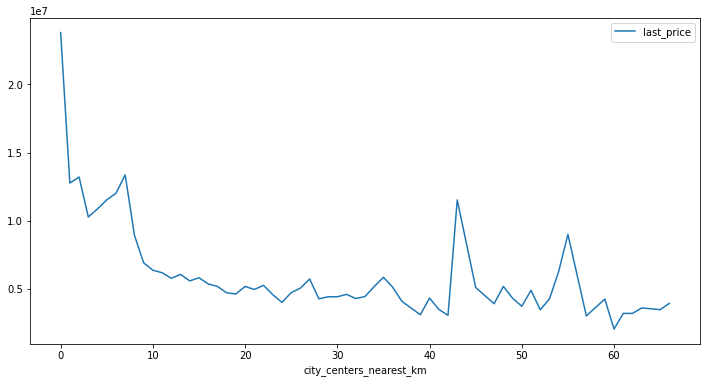

In [61]:
# Создадим два списка, в которые будем сохранять полученные данные

# В переменной сохраним срез необходимых данных, расстояние от центра в Санкт-Петербурге
spb_km = data[data['locality_name'] == 'Санкт-Петербург']
spb_km = data.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
spb_km.plot(figsize=(12, 6));


На графике видно, что дороже всего стоят квартиры в самом центре города, далее идут квартиры, которые располагаются на расстоянии не более 5 км. Цена квартир от 10 км. до 40 находится на примерно одном уровне. Сильно выделяются на этом фоне квартиры в 45 и 55 км. от центра, их цена резко возрастает.

In [62]:
def km_price(dist):
    try:
        if 0 < dist <=5:
            return 1
        elif 5 < dist<= 10:
            return 2
        elif 10 < dist <= 20:
            return 3
        elif 20 < dist <= 30:
            return 4
        elif 30 < dist <= 40:
            return 5
        elif 40 < dist <= 50:
            return 6
        elif dist > 50:
            return 7
    except:
        pass


<AxesSubplot:xlabel='distance_cat'>

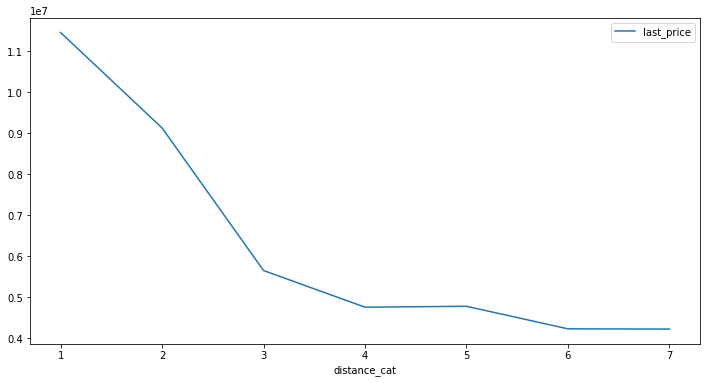

In [63]:
data['distance_cat'] = data['city_centers_nearest_km'].apply(km_price)
km_table = data.pivot_table(index='distance_cat', values='last_price', aggfunc='mean')
km_table.plot(figsize=(12,6));

Расположив расстояние от центра по 7 группам, мы подтверждает то, что самые дорогие квартиры находятся в группах с 1 по 3 (от 0 до 30 км от центра).

**Промежуточный вывод**

Были описаны графики, построенные по данным из таблицы, изучены факторы, влияющие на стоимость квартир, обозначена средняя стоимость одного квадратного метра в городах с самым большим количеством объявлений, а также посчитана средняя стоимость километров в расстоянии от центра Санкт-Петербурга.

## Общий вывод

В ходе исследования архива объявлений были заполнены пропуски в данных, заполняемых пользователем, удалены или исправлены аномальные значения данных, изменены типы данных некоторых столбцов, построены и изучены графики по данным таблицы. В результате исследования можно сделать вывод, что стоимость квартиры больше всего зависит от общей площади квартиры, жилой площади, площади кухни, удаленности от центра города. Год, публикации, количество комнат, день недели публикации и месяца публикации почти не имеют влияния на стоимость. Самая высокая средняя цена наблюдается в Санкт-Петербурге и Пушкино. 

Средние показатели основных исследуемых значений: общая площадь - 58 кв.м., жилая площадь - 33 кв.м., площадь кухни - 10кв.м., общая стоимость - 5975976, среднее расстояние до центра города - 14293 м.